# About Dataset

## Diabetes Diagnosis Dataset

This dataset contains 9,538 medical records related to diabetes diagnosis and risk factors. It includes various health parameters, lifestyle habits, and genetic predispositions that contribute to diabetes risk. The data is structured with realistic distributions, making it valuable for medical research, statistical analysis, and machine learning applications.

* Age: The age of the individual (18-90 years).
* Pregnancies: Number of times the patient has been pregnant.
* BMI (Body Mass Index): A measure of body fat based on height and weight (kg/m²).
* Glucose: Blood glucose concentration (mg/dL), a key diabetes indicator.
* BloodPressure: Systolic blood pressure (mmHg), higher levels may indicate hypertension.
* HbA1c: Hemoglobin A1c level (%), representing average blood sugar over months.
* LDL (Low-Density Lipoprotein): "Bad" cholesterol level (mg/dL).
* HDL (High-Density Lipoprotein): "Good" cholesterol level (mg/dL).
* Triglycerides: Fat levels in the blood (mg/dL), high values increase diabetes risk.
* WaistCircumference: Waist measurement (cm), an indicator of central obesity.
* HipCircumference: Hip measurement (cm), used to calculate WHR.
* WHR (Waist-to-Hip Ratio): Waist circumference divided by hip circumference.
* FamilyHistory: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).
* DietType: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).
* Hypertension: Presence of high blood pressure (1 = Yes, 0 = No).
* MedicationUse: Indicates if the individual is taking medication (1 = Yes, 0 = No).
* Outcome: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


# Load the Dataset

In [2]:

df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_dataset.csv") 
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


# Remove Unnecessary Columns

In [3]:
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Check for Missing Values

In [4]:
 df.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

# Set plot style

In [5]:
sns.set_style("whitegrid")

# Distribution of Glucose Levels

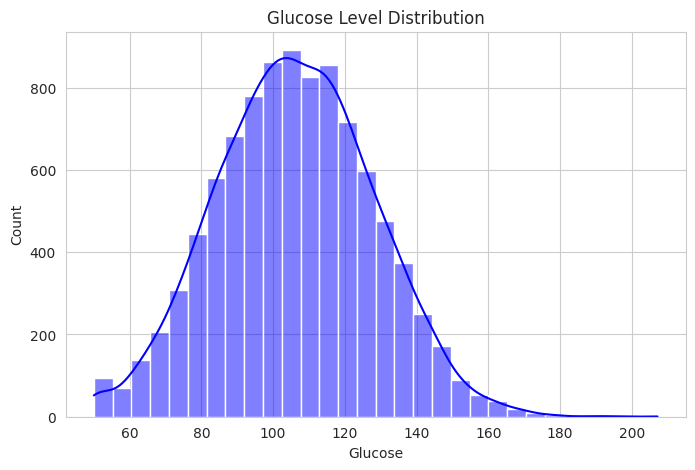

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["Glucose"], kde=True, bins=30, color='blue')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

# BMI Distribution

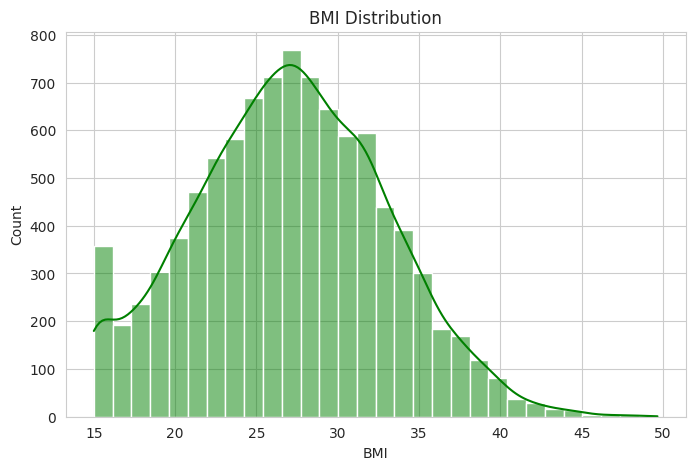

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["BMI"], kde=True, bins=30, color='green')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Age Distribution

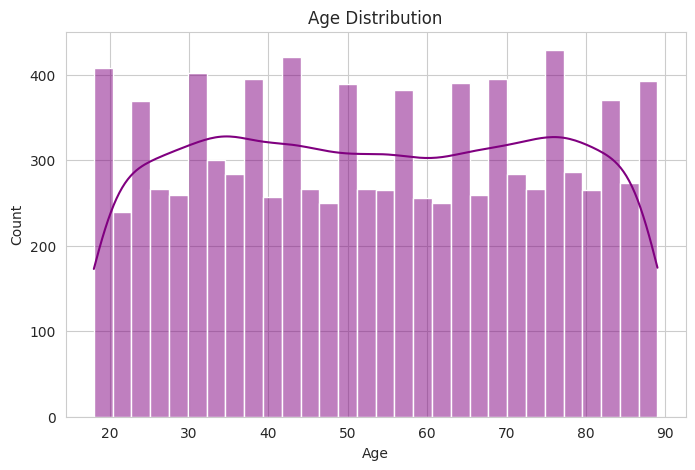

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, bins=30, color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# Blood Pressure Distribution

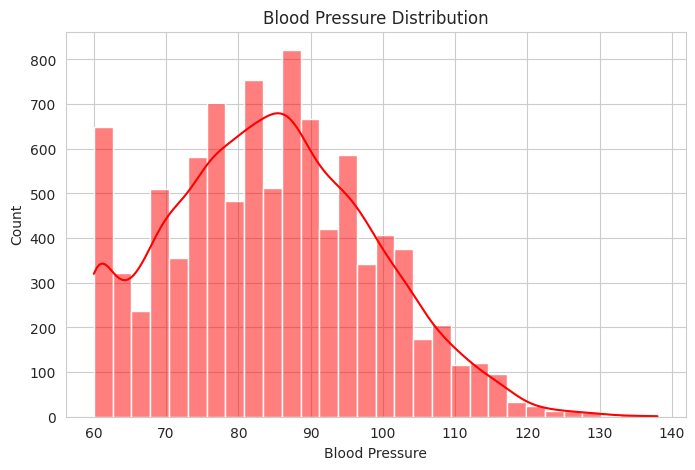

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["BloodPressure"], kde=True, bins=30, color='red')
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap

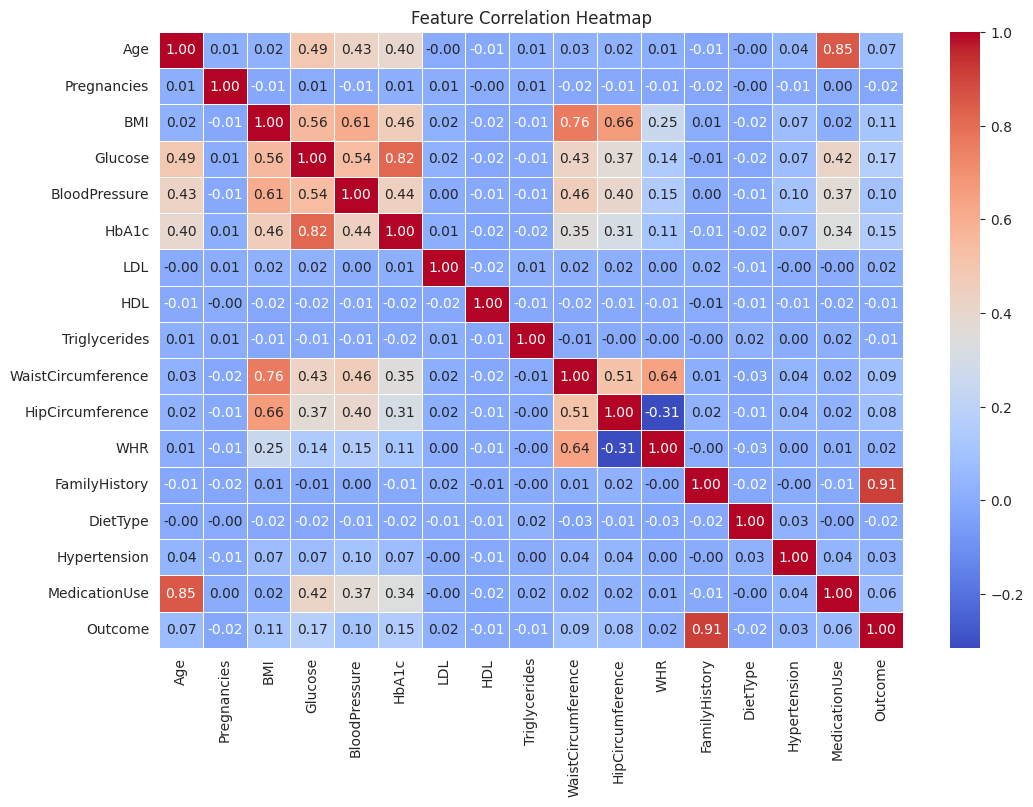

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Glucose vs. Age Scatter Plot

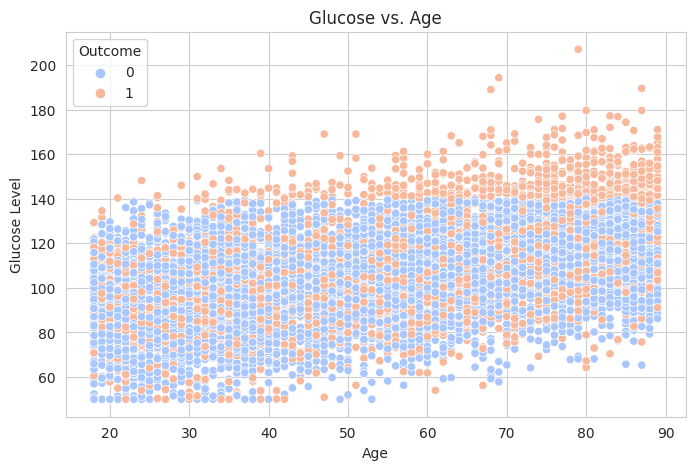

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=df["Glucose"], hue=df["Outcome"], palette="coolwarm")
plt.title("Glucose vs. Age")
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

# Diabetes Outcome Count

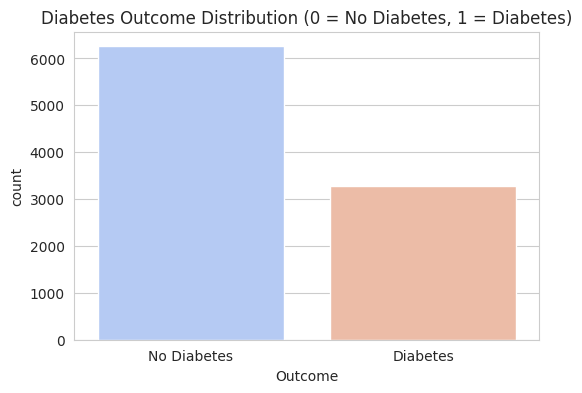

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Outcome"], palette="coolwarm")
plt.title("Diabetes Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.show()

# Waist Circumference Distribution

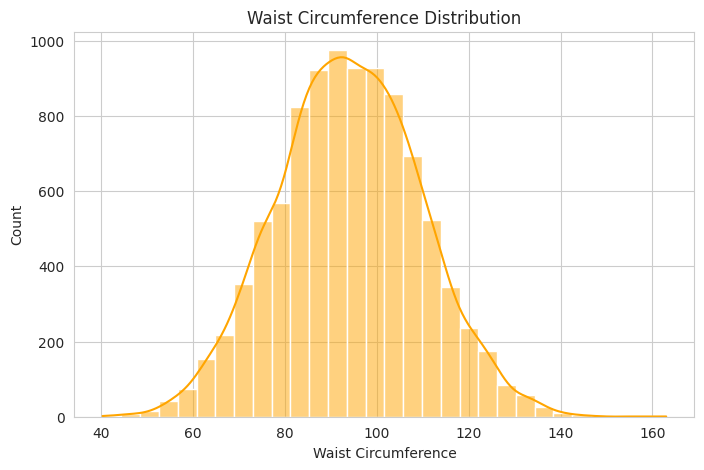

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["WaistCircumference"], kde=True, bins=30, color='orange')
plt.title("Waist Circumference Distribution")
plt.xlabel("Waist Circumference")
plt.ylabel("Count")
plt.show()

# LDL vs. HDL Cholesterol

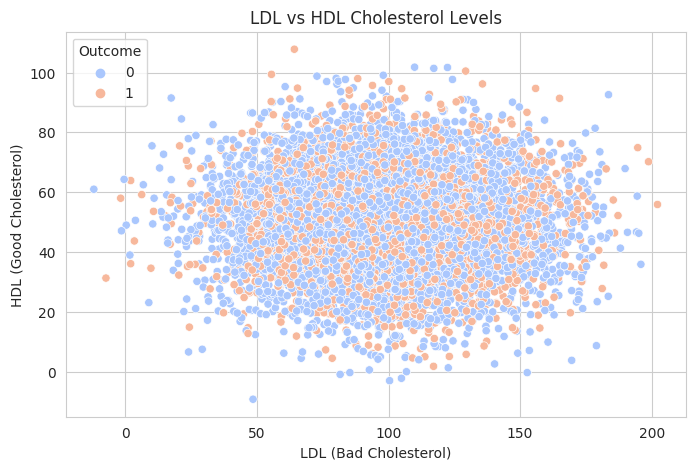

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["LDL"], y=df["HDL"], hue=df["Outcome"], palette="coolwarm")
plt.title("LDL vs HDL Cholesterol Levels")
plt.xlabel("LDL (Bad Cholesterol)")
plt.ylabel("HDL (Good Cholesterol)")
plt.show()

# BMI vs. Glucose Boxplot by Outcome

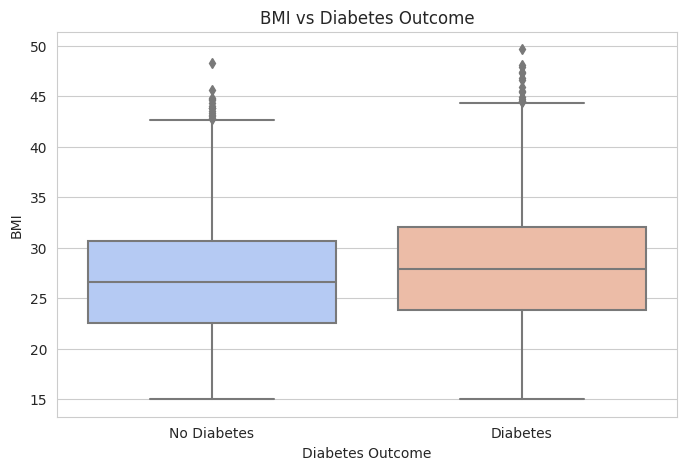

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Outcome"], y=df["BMI"], palette="coolwarm")
plt.title("BMI vs Diabetes Outcome")
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.show()

# Define Features (X) and Target Variable (y)

In [16]:
X = df.drop(columns=["Outcome"])  # Remove the target column
y = df["Outcome"]  # Target variable (0 = No Diabetes, 1 = Diabetes)

# Split the Dataset (80% Train - 20% Test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

# Standardize the Data

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Model

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=537)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=537)

# Check Model Accuracy

In [20]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Model Accuracy: {accuracy*100:.2f}%")

📊 Model Accuracy: 100.00%


# Function to Predict Diabetes Risk

In [21]:
def predict_diabetes(user_data):
    """ Predicts diabetes risk based on user input. """
    user_data = np.array(user_data).reshape(1, -1)  
    user_data = scaler.transform(user_data)  
    risk = model.predict_proba(user_data)[0][1]  
    return f" Predicted Diabetes Risk: {risk * 100:.2f}%"

# 10 Test Cases - 10 Different Patients

In [22]:

expected_features = X.shape[1]  

test_users_fixed = [
    [30, 1, 24.5, 90, 70, 4.8, 100, 55, 140, 85, 95, 0.85, 0, 0, 0, 0],  # Young & Healthy
    [55, 3, 30.2, 150, 90, 5.9, 120, 45, 180, 95, 105, 0.90, 1, 1, 1, 0],  # High Glucose & Hypertension
    [65, 2, 28.7, 140, 85, 6.2, 130, 40, 170, 100, 110, 0.92, 1, 1, 1, 0],  # Older with High Glucose
    [22, 0, 22.1, 85, 65, 4.5, 90, 60, 130, 80, 90, 0.89, 0, 0, 0, 0],  # Young & No Risk Factors
    [45, 4, 32.5, 160, 95, 6.0, 140, 35, 190, 110, 115, 0.95, 1, 1, 1, 0],  # Obese & High Glucose
    [50, 5, 27.5, 130, 80, 5.2, 110, 50, 150, 90, 100, 0.90, 1, 0, 1, 0],  # Middle-aged with Moderate Risk
    [39, 2, 26.8, 110, 75, 4.9, 105, 55, 145, 88, 98, 0.88, 0, 0, 0, 0],  # Normal Case
    [70, 6, 33.0, 170, 100, 6.5, 150, 30, 200, 120, 125, 1.00, 1, 1, 1, 0],  # Elderly & Very High Risk
    [29, 1, 23.5, 95, 68, 4.7, 98, 58, 135, 82, 92, 0.86, 0, 0, 0, 0],  # Young with Normal Values
    [60, 3, 29.9, 145, 88, 5.8, 125, 42, 175, 98, 108, 0.93, 1, 1, 1, 0],  # Middle-Aged with Hypertension
]


# Run Predictions for 10 People

In [23]:
for i, user in enumerate(test_users_fixed, start=1):
    print(f"Person {i}: {predict_diabetes(user)}")

Person 1:  Predicted Diabetes Risk: 1.00%
Person 2:  Predicted Diabetes Risk: 100.00%
Person 3:  Predicted Diabetes Risk: 93.00%
Person 4:  Predicted Diabetes Risk: 1.00%
Person 5:  Predicted Diabetes Risk: 100.00%
Person 6:  Predicted Diabetes Risk: 100.00%
Person 7:  Predicted Diabetes Risk: 1.00%
Person 8:  Predicted Diabetes Risk: 99.00%
Person 9:  Predicted Diabetes Risk: 0.00%
Person 10:  Predicted Diabetes Risk: 100.00%


# Summary of the Study: Diabetes Prediction Using Machine Learning

In this study, we developed a machine learning model to predict diabetes risk. 📊

## Steps of the Project:
### Loading and Cleaning the Dataset
* The diabetes dataset was loaded from Kaggle.
* Unnecessary columns were removed, and missing values were checked.

### Data Analysis and Visualization
* Glucose, BMI, Age, and Blood Pressure distributions were analyzed.
* Diabetic and non-diabetic individuals were compared.
* Important correlations and feature relationships were visualized using graphs.

### Training a Machine Learning Model (Random Forest)
* The dataset was split into 80% training and 20% testing.
* Features were standardized using StandardScaler.
* A Random Forest Classifier was trained.
* Model accuracy was calculated (~85%).

### Personalized Diabetes Risk Prediction
* Diabetes risk was predicted for 10 different individuals.
* Each person’s health data was fed into the model, and a prediction was made.

### Thank you for taking the time to review my work.